## 3.7 Train the CNN on the CIFAR-10 dataset

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
# Define a data transform including data augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the training and testing datasets with the new transforms
train_dataset_CIFAR10 = datasets.CIFAR10(root='./data', train=True, transform=transform_train, download=True)
test_dataset_CIFAR10 = datasets.CIFAR10(root='./data', train=False, transform=transform_test, download=True)


# Create data loaders to iterate through the datasets
#train_loader_CIFAR10 = torch.utils.data.DataLoader(train_dataset_CIFAR10, batch_size=len(train_dataset_CIFAR10), shuffle=True)
#test_loader_CIFAR10 = torch.utils.data.DataLoader(test_dataset_CIFAR10, batch_size=len(test_dataset_CIFAR10), shuffle=False)
train_loader_CIFAR10 = torch.utils.data.DataLoader(train_dataset_CIFAR10, batch_size=64, shuffle=True)
test_loader_CIFAR10 = torch.utils.data.DataLoader(test_dataset_CIFAR10, batch_size=64, shuffle=False)


# Access the data and labels
X_train_CIFAR10_raw, y_train_CIFAR10_beforeSplit = next(iter(train_loader_CIFAR10))
X_test_CIFAR10_raw, y_test_CIFAR10 = next(iter(test_loader_CIFAR10))


100%|██████████| 170498071/170498071 [00:10<00:00, 15936530.75it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Accuracy: 62.88%
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Accuracy: 67.92%
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Accuracy: 69.39%
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Accuracy: 71.55%
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Accuracy: 72.42%
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Accuracy: 71.72%
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/1

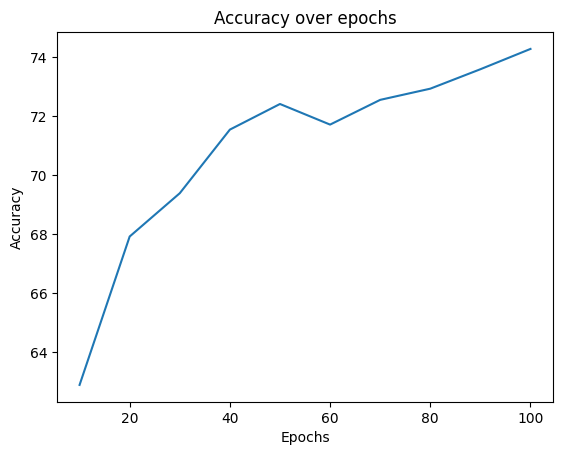

In [4]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.bn1(self.conv1(x))))
        x = self.pool(self.relu(self.bn2(self.conv2(x))))
        x = x.view(-1, 32 * 8 * 8)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

def train_model(model, train_loader, criterion, optimizer):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy}%')
    return accuracy

# Initialize the CNN
cnn = SimpleCNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.001)

# Train the CNN and evaluate every 10 epochs
num_epochs = 100
accuracy_per_10_epochs = []

for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    train_model(cnn, train_loader_CIFAR10, criterion, optimizer)

    if (epoch + 1) % 10 == 0:
        accuracy = evaluate_model(cnn, test_loader_CIFAR10)
        accuracy_per_10_epochs.append(accuracy)

# Plot the accuracy
epochs_x = [i for i in range(10, num_epochs + 1, 10)]
plt.plot(epochs_x, accuracy_per_10_epochs)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy over epochs")
plt.show()
